# Portfolio Project: Analysing Medical Insurance Cost

## Project Objectives:
- Work locally on your own computer
- Import a dataset into your program
- Analyze a dataset by building out functions or class methods
- Use libraries to assist in your analysis
- Optional: Document and organize your findings
- Optional: Make predictions about a dataset’s features based on your findings

## Data Source:
https://www.kaggle.com/datasets/mirichoi0218/insurance


## Step 1: Understanding the data

### Kaggle gives basic information for each field:

*age:* age of primary beneficiary

*sex:* insurance contractor gender (female, male)

*bmi:* Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

*children:* Number of children covered by health insurance / Number of dependents

*smoker:* Smoking

*region:* the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*charges:* Individual medical costs billed by health insurance

## Step 1: Understanding the data

### Kaggle gives basic information for each field:

*age:* age of primary beneficiary

*sex:* insurance contractor gender (female, male)

*bmi:* Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

*children:* Number of children covered by health insurance / Number of dependents

*smoker:* Smoking

*region:* the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*charges:* Individual medical costs billed by health insurance

## Step 2: Scoping the project

Defining my project goals:

### Goal 1: initial understanding of how data is distributed
1.1 What is the average age in the dataset?
- we need to sum(age) for all rows and divide by count(rows)
  
1.2 How is BMI distributed?
- find the range of BMI values
- learn how to create a visual chart
- create visual chart
- learn how to calculate statistics like Q1, Q2, Q3, IQR etc
- calculate statistics for BMI

### Goal 2: advanced understanding

2.1 What is the relationship between each variable and the insurance cost?
- learn how to run correlation between variables in 2 columns
- run correlation
- repeat for all variables
  
2.2 Can we get the function to calculate cost based on the other variables? with which level of confidence?
- learn :)
  

### Step 3: Import the dataset


In [40]:
import csv

path_to_datasources = '/Users/egraciani/Python/CodeAcademy/Datasources/'
insurance_data_csv_file = 'insurance.csv'
file_path = path_to_datasources + insurance_data_csv_file

with open(file_path, newline='') as csvfile:
    csvreader = csv.DictReader(csvfile)
    data = list(csvreader)
# Now `data` is a list of dictionaries, where each dictionary represents a row from the CSV file

print('First 5 results:')
print(data[:5])
print('---- ')
# Example: Access the first row (as a dictionary)
print('First row:')
print(data[0])
print('---- ')

#Example: Access a specific value from the first row
# Replace 'ColumnName' with the actual name of the column you're interested in
print('First value for \'sex\':')
print(data[0]['sex'])
print('---- ')


First 5 results:
[{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}, {'age': '18', 'sex': 'male', 'bmi': '33.77', 'children': '1', 'smoker': 'no', 'region': 'southeast', 'charges': '1725.5523'}, {'age': '28', 'sex': 'male', 'bmi': '33', 'children': '3', 'smoker': 'no', 'region': 'southeast', 'charges': '4449.462'}, {'age': '33', 'sex': 'male', 'bmi': '22.705', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '21984.47061'}, {'age': '32', 'sex': 'male', 'bmi': '28.88', 'children': '0', 'smoker': 'no', 'region': 'northwest', 'charges': '3866.8552'}]
---- 
First row:
{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}
---- 
First value for 'sex':
female
---- 


## Step 4: Analysis

### 4.1: Clean and prepare data

Note: ideally we might want to generate a report with inconsistencies/blanks/errors.


In [56]:
#Transform all numbers stored as strings to float or integer
def convert_to_numeric(s):
    try:
        return float(s) if '.' in s else int(s)
    except ValueError:
        return s

def convert_smoker_to_int(smoker_status):
    return 1 if smoker_status == 'yes' else 0


# Assuming 'age' is among the keys in numeric_keys
numeric_keys = ['age', 'bmi', 'children', 'charges']
converted_data = [
    {k: convert_to_numeric(v) if k in numeric_keys else convert_smoker_to_int(v) if k == 'smoker' else v for k, v in item.items()}
    for item in data
]
print("First 2 records with cleaned data:")
converted_data[:2]

First 2 records with cleaned data:


[{'age': 19,
  'sex': 'female',
  'bmi': 27.9,
  'children': 0,
  'smoker': 1,
  'region': 'southwest',
  'charges': 16884.924},
 {'age': 18,
  'sex': 'male',
  'bmi': 33.77,
  'children': 1,
  'smoker': 0,
  'region': 'southeast',
  'charges': 1725.5523}]

### 4.2: Goal 1: initial understanding of how data is distributed

### 4.2.1 What is the average age in the dataset?

we need to sum(age) for all rows and divide by count(rows)


In [59]:
#We start creating a function to get any variable from the dataset
# Parameters: 
## variable_to_get is the column in the dataset: 'age', 'sex', 'bmi', 'children', 'smoker', 'region' and 'charges'
## data is the dataset to extract the column
# Returns: a list containing the values for the variable 'age', 'sex', etc. 
def get_variable(variable_to_get, data):
    if variable_to_get in data[0]:
        single_variable = []
        for values in data:
            single_variable.append(values[variable_to_get])
        return single_variable
    else: return "Variable not found in dataset"

#Note: we use the converted_data 
ages = get_variable('age', converted_data)
print("The first 10 ages in the dataset are: {age}".format(age=ages[0:10]))

sexes = get_variable('sex', converted_data)
print("The first 10 sexes in the dataset are: {sex}".format(sex=sexes[0:10]))

bmis = get_variable('bmi', converted_data)
print("The first 10 bmis in the dataset are: {bmi}".format(bmi=bmis[0:10]))

childrens = get_variable('children', converted_data)
print("The first 10 childrens in the dataset are: {children}".format(children=childrens[0:10]))

smokers = get_variable('smoker', converted_data)
print("The first 10 smokers in the dataset are: {smoker}".format(smoker=smokers[0:10]))

regions = get_variable('region', converted_data)
print("The first 10 regions in the dataset are: {region}".format(region=regions[0:10]))

costs = get_variable('charges', converted_data)
print("The first 10 costs in the dataset are: {cost}".format(cost=costs[0:10]))

The first 10 ages in the dataset are: [19, 18, 28, 33, 32, 31, 46, 37, 37, 60]
The first 10 sexes in the dataset are: ['female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female']
The first 10 bmis in the dataset are: [27.9, 33.77, 33, 22.705, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84]
The first 10 childrens in the dataset are: [0, 1, 3, 0, 0, 0, 1, 3, 2, 0]
The first 10 smokers in the dataset are: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The first 10 regions in the dataset are: ['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest']
The first 10 costs in the dataset are: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692]


In [79]:
#Let's create a function to calculate average for a column
# Parameter: values is the list with numerical values
# Returns: the average or '
def get_average(values):
    valid_values = [ages, bmis, childrens, costs]
    if values in valid_values:
        average = sum(values)/len(values)
        return average
    else: 
        print('Not valid.')
        return None
    
print('Test 1: get_average(sexes):')
get_average(sexes)       
print('--------------')    
print('Test 2: get_average(ages):')
average_age = get_average(ages)  
print("The rounded average is: {average_age}".format(average_age=round(average_age,2)))  
print('--------------')    
print('Test 3: get_average(bmis):')
average_bmi = get_average(bmis)  
print("The rounded average is: {average_bmi}".format(average_bmi=round(average_bmi,2)))  
print('--------------')    
print('Test 4: get_average(costs):')
average_cost = get_average(costs)  
print("The rounded average is: {average_cost}".format(average_cost=round(average_cost,2)))  

Test 1: get_average(sexes):
Not valid.
--------------
Test 2: get_average(ages):
The rounded average is: 39.21
--------------
Test 3: get_average(bmis):
The rounded average is: 30.66
--------------
Test 4: get_average(costs):
The rounded average is: 13270.42


### 4.2.2 How is BMI distributed?

- find the range of BMI values
- learn how to create a visual chart
- create visual chart
- learn how to calculate statistics like Q1, Q2, Q3, IQR etc
- calculate statistics for BMI

In [85]:
#Range = [min, max]
minimum_bmi = min(bmis)
maximum_bmi = max(bmis)
range_bmi = [minimum_bmi, maximum_bmi]
print(f"Range is {range_bmi}")

Range is [15.96, 53.13]


In [90]:
import numpy as np

def calculate_summary_statistics(values):
    statistics = {
        'Mean': np.mean(values),
        'Minimum': np.min(values),
        'Maximum': np.max(values),
        'Standard Deviation': np.std(values),
        'Q1 (25th Percentile)': np.percentile(values, 25),
        'Q2 (Median, 50th Percentile)': np.percentile(values, 50),
        'Q3 (75th Percentile)': np.percentile(values, 75),
        'IQR (Interquartile Range)': np.percentile(values, 75) - np.percentile(values, 25)
    }
    return statistics

print("Summary statistics for BMI:")
calculate_summary_statistics(bmis)


Summary statistics for BMI:


{'Mean': 30.66339686098655,
 'Minimum': 15.96,
 'Maximum': 53.13,
 'Standard Deviation': 6.0959076415894256,
 'Q1 (25th Percentile)': 26.29625,
 'Q2 (Median, 50th Percentile)': 30.4,
 'Q3 (75th Percentile)': 34.69375,
 'IQR (Interquartile Range)': 8.3975}

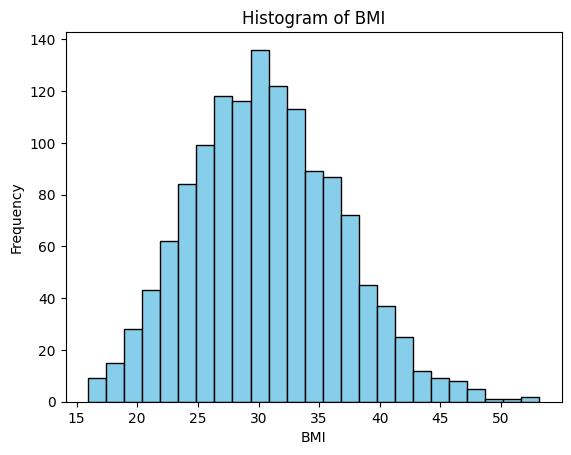

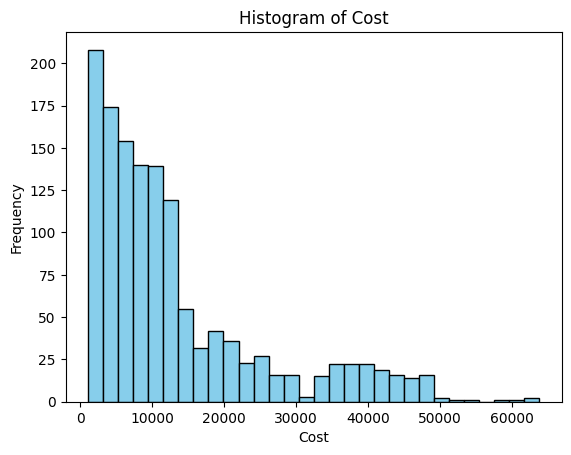

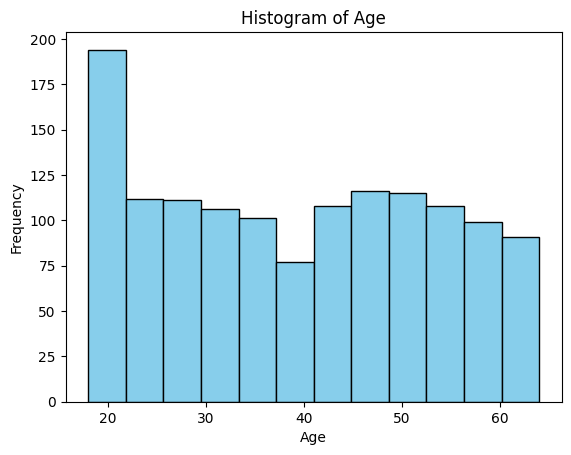

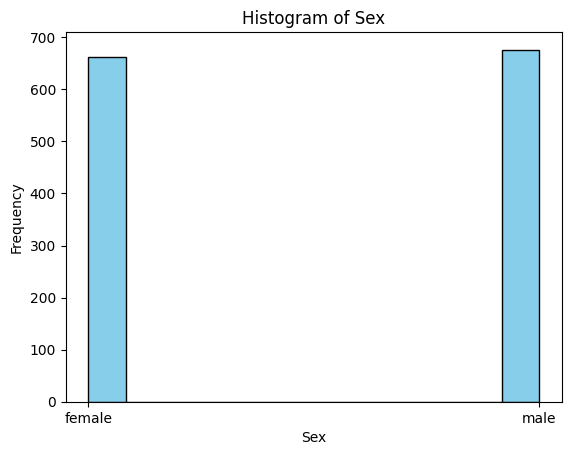

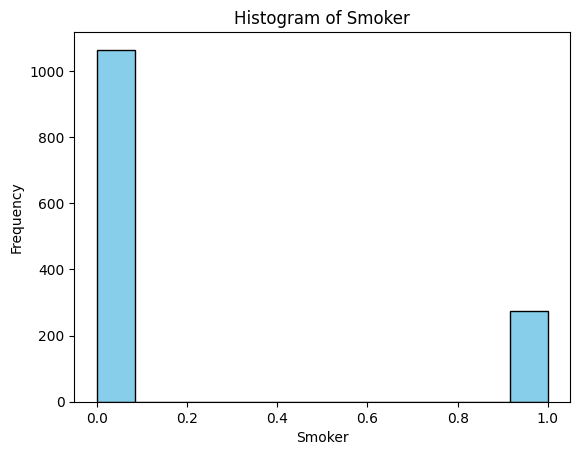

In [110]:
import matplotlib.pyplot as plt

def plot_histogram(values, name):
    plt.hist(values, bins='auto', color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {name}')
    plt.xlabel(f'{name}')
    plt.ylabel('Frequency')
    plt.show()

plot_histogram(bmis, 'BMI')
plot_histogram(costs, 'Cost')
plot_histogram(ages, 'Age')
plot_histogram(sexes, 'Sex')
plot_histogram(smokers, 'Smoker')


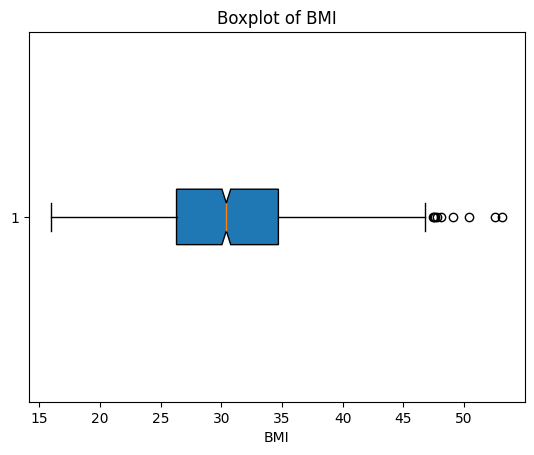

In [111]:
def plot_boxplot(values, name):
    plt.boxplot(values, vert=False, patch_artist=True, notch=True)
    plt.title(f'Boxplot of {name}')
    plt.xlabel(f'{name}')
    plt.show()

plot_boxplot(bmis, 'BMI')



### 4.3 - What is the relationship between each variable and the insurance cost?

- learn how to run correlation between variables in 2 columns
- run correlation
- repeat for all variables



In [112]:
# Plot correlation
def plot_correlation(list1, list2):
    # Calculate the Pearson correlation coefficient
    correlation = np.corrcoef(list1, list2)[0, 1]

    # Set the figure size to be smaller
    plt.figure(figsize=(4, 3))  # Smaller figure size in inches (width, height)

    # Plot the values in a scatter plot
    plt.scatter(list1, list2, color='blue', edgecolor='k', alpha=0.6, label=f'Correlation Coef: {correlation:.2f}')
    plt.title('Scatter Plot and Correlation')
    plt.xlabel('List 1 Values')
    plt.ylabel('List 2 Values')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    return correlation

#Helps to interpret correlation coef
def calculate_correlation(list1, list2):
    correlation = np.corrcoef(list1, list2)[0, 1]
    if correlation == 1:
        return "Perfect positive correlation"
    elif correlation == -1:
        return "Perfect negative correlation"
    elif 0.8 <= abs(correlation) <= 1:
        return "Very strong correlation"
    elif 0.6 <= abs(correlation) < 0.8:
        return "Strong correlation"
    elif 0.4 <= abs(correlation) < 0.6:
        return "Moderate correlation"
    elif 0.2 <= abs(correlation) < 0.4:
        return "Weak correlation"
    elif 0 < abs(correlation) < 0.2:
        return "Very weak or no correlation"
    else:  # This covers the case where r is exactly 0
        return "No correlation"



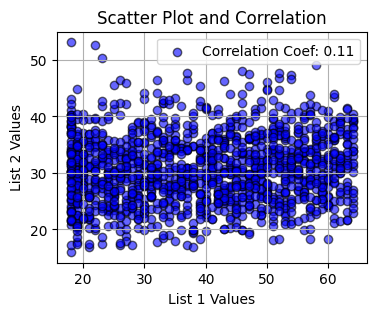

'Very weak or no correlation'

In [107]:
plot_correlation(ages, bmis)
calculate_correlation(ages, bmis)

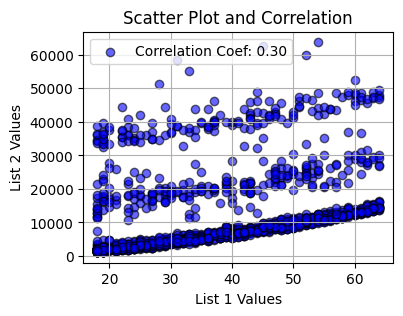

'Weak correlation'

In [113]:
plot_correlation(ages, costs)
calculate_correlation(ages, costs)

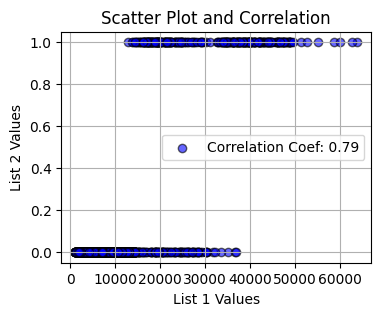

'Strong correlation'

In [115]:
plot_correlation(smokers, costs)
calculate_correlation(smokers, costs)

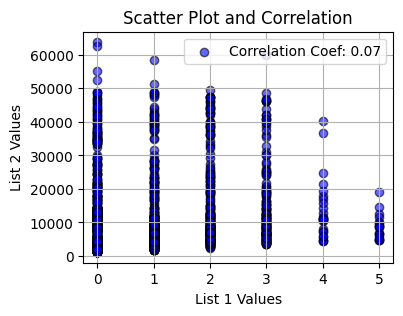

'Very weak or no correlation'

In [119]:
plot_correlation(childrens, costs)
calculate_correlation(childrens, costs)

### Let's also understand if there is any pattern when comparing regions

In [139]:
#Now I want to breakdown the costs per  -> we need a different structure for our data
costs_per_region = {}
for cost, region in zip(costs, regions):
    if region not in costs_per_region:
        costs_per_region[region] = []
    costs_per_region[region].append(cost)

cost_northwest = costs_per_region['northwest']
cost_northeast = costs_per_region['northeast']

cost_southwest = costs_per_region['southwest']
cost_southeast = costs_per_region['southeast']

# calculate_summary_statistics(values)
print("Southwest statistics:")
print(calculate_summary_statistics(cost_southwest))
print("\n")
print("Southeast statistics:")
print(calculate_summary_statistics(cost_southeast))
print("\n")
print("Northwest statistics:")
print(calculate_summary_statistics(cost_northwest))
regions
print("\n")
print("Northeast statistics:")
print(calculate_summary_statistics(cost_northeast))


Southwest statistics:
{'Mean': 12346.937377292308, 'Minimum': 1241.565, 'Maximum': 52590.82939, 'Standard Deviation': 11539.38512699184, 'Q1 (25th Percentile)': 4751.07, 'Q2 (Median, 50th Percentile)': 8798.593, 'Q3 (75th Percentile)': 13462.52, 'IQR (Interquartile Range)': 8711.45}


Southeast statistics:
{'Mean': 14735.411437609888, 'Minimum': 1121.8739, 'Maximum': 63770.42801, 'Standard Deviation': 13951.894320685302, 'Q1 (25th Percentile)': 4440.886200000001, 'Q2 (Median, 50th Percentile)': 9294.131949999999, 'Q3 (75th Percentile)': 19526.2869, 'IQR (Interquartile Range)': 15085.400699999998}


Northwest statistics:
{'Mean': 12417.57537396923, 'Minimum': 1621.3402, 'Maximum': 60021.39897, 'Standard Deviation': 11055.229531899642, 'Q1 (25th Percentile)': 4719.73655, 'Q2 (Median, 50th Percentile)': 8965.79575, 'Q3 (75th Percentile)': 14711.7438, 'IQR (Interquartile Range)': 9992.00725}


Northeast statistics:
{'Mean': 13406.384516385804, 'Minimum': 1694.7964, 'Maximum': 58571.07448, 

### It's hard to read - let's compare the boxplots:

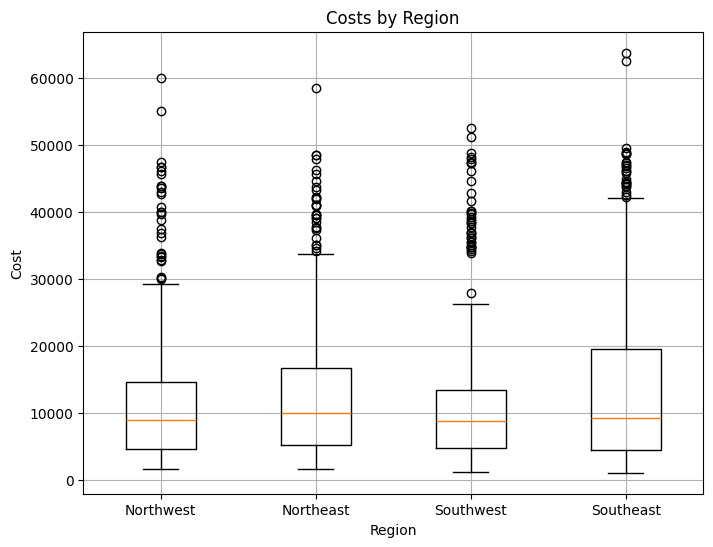

In [140]:
plt.figure(figsize=(8, 6))
plt.boxplot([cost_northwest, cost_northeast, cost_southwest, cost_southeast], 
            labels=['Northwest', 'Northeast', 'Southwest', 'Southeast'])
plt.title('Costs by Region')
plt.ylabel('Cost')
plt.xlabel('Region')
plt.grid(True)
plt.show()

### 4.4 -Can we get the function to calculate cost based on the other variables? with which level of confidence?


In [ ]:
# We need to create a regression model. The question is - which variables should we consider? 

# need to learn more about the topic :) 